In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [21]:
df=pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [29]:
df = df[['Description','Country']]
df

,Description,Country
0,1443,973
1,1862,973
2,3320,973
3,4601,973
4,2074,973
...,...,...
541904,3497,416
541905,3552,416
541906,2179,416
541907,3813,416


In [30]:
name_list = list(df['Description'].values) + list(df['Country'].values)

In [31]:
uni_list = list(set((name_list)))

In [32]:
label_dict = {}
for index, possible_label in enumerate(uni_list):
    label_dict[possible_label] = index
label_dict

{0: 0,
 1: 1,
 11: 2,
 13: 3,
 18: 4,
 19: 5,
 22: 6,
 27: 7,
 83: 8,
 109: 9,
 110: 10,
 130: 11,
 140: 12,
 145: 13,
 149: 14,
 153: 15,
 183: 16,
 191: 17,
 193: 18,
 203: 19,
 206: 20,
 221: 21,
 231: 22,
 235: 23,
 238: 24,
 247: 25,
 252: 26,
 254: 27,
 255: 28,
 259: 29,
 263: 30,
 267: 31,
 271: 32,
 274: 33,
 275: 34,
 276: 35,
 279: 36,
 280: 37,
 281: 38,
 283: 39,
 286: 40,
 288: 41,
 292: 42,
 293: 43,
 295: 44,
 303: 45,
 305: 46,
 307: 47,
 308: 48,
 311: 49,
 312: 50,
 315: 51,
 316: 52,
 321: 53,
 325: 54,
 328: 55,
 330: 56,
 336: 57,
 339: 58,
 340: 59,
 341: 60,
 342: 61,
 344: 62,
 345: 63,
 347: 64,
 348: 65,
 349: 66,
 350: 67,
 352: 68,
 354: 69,
 355: 70,
 356: 71,
 357: 72,
 360: 73,
 361: 74,
 363: 75,
 364: 76,
 371: 77,
 373: 78,
 376: 79,
 379: 80,
 380: 81,
 381: 82,
 383: 83,
 387: 84,
 391: 85,
 397: 86,
 398: 87,
 400: 88,
 401: 89,
 404: 90,
 410: 91,
 411: 92,
 413: 93,
 415: 94,
 416: 95,
 417: 96,
 419: 97,
 420: 98,
 421: 99,
 424: 100,
 426: 101,

In [33]:
df = df[['Description','Country']]
df['Description'] = df['Description'].replace(label_dict)
df['Country'] = df['Country'].replace(label_dict)
df.head()

,Description,Country
0,1053,585
1,1471,585
2,2926,585
3,4155,585
4,1682,585


In [34]:
X = df.iloc[:].values
X[:5] # Show first 5 records only

array([[1053,  585],
       [1471,  585],
       [2926,  585],
       [4155,  585],
       [1682,  585]], dtype=int64)

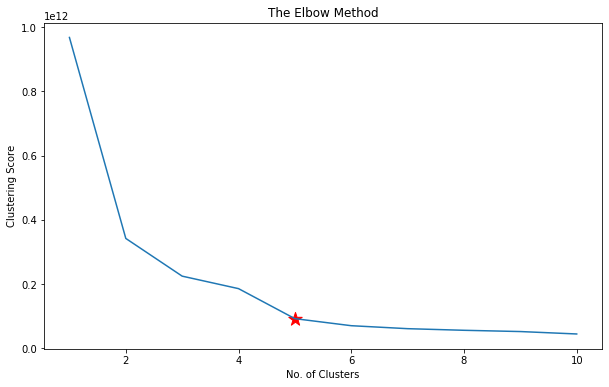

In [35]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [52]:
kmeans= KMeans(n_clusters = 4, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([0, 2, 1, ..., 2, 1, 1])

In [53]:
df['cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['cluster'].value_counts())
df

Number of data points in each cluster= 
 0    185502
1    174521
2    171137
3     10749
Name: cluster, dtype: int64


,Description,Country,cluster
0,1053,585,0
1,1471,585,2
2,2926,585,1
3,4155,585,1
4,1682,585,2
...,...,...,...
541904,3100,95,1
541905,3154,95,1
541906,1787,95,2
541907,3415,95,1


Text(0.5, 1.0, 'Product Category')

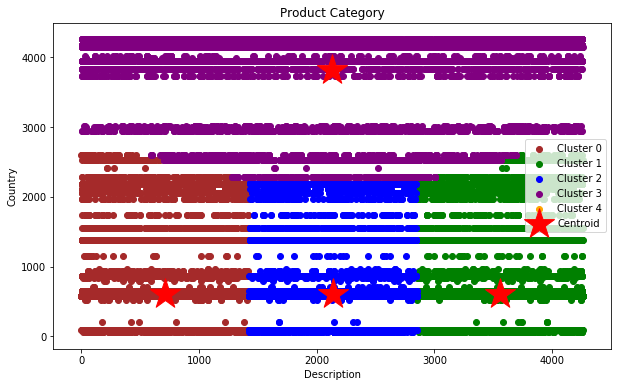

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 1000, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Description')
plt.ylabel('Country')
plt.legend()
plt.title('Product Category')

In [46]:
data = df.values[:, 0:3]
category = df.values[:, 3]

# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(100):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

IndexError: index 3 is out of bounds for axis 1 with size 3